<a href="https://colab.research.google.com/github/sh3986/kaggle/blob/main/model_%EC%84%B1%EB%8A%A5%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Library

In [2]:
import numpy as np 
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:.5f}".format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

import os
from os import listdir
from os.path import isfile, join
import cv2
from PIL import Image
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Average
from tensorflow.keras import optimizers
tf.__version__

'2.8.2'

In [3]:
# Visualization
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

import skimage.morphology as morp
from skimage.filters import rank
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

TensoFlow Version:  2.8.2


In [4]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn"

In [5]:
import os
os.chdir(data_path)

In [6]:
data = []
labels = []

height = 180
width = 180
channels = 3
num_classes = 43

### 데이터 로드

In [7]:
import pickle
with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_data_180.pkl","rb") as f:
    data_180 = pickle.load(f)

with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_data_224.pkl","rb") as f:
    data_224 = pickle.load(f)

with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_label_180.pkl","rb") as f:
    labels = pickle.load(f)

In [8]:
def to_grayscale_then_rgb(img):
    img = img
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.grayscale_to_rgb(img)
    return np.array(img)

def preprocessing(img):
    img = to_grayscale_then_rgb(img)
    return img

### 모델 성능 평가

In [9]:
from tensorflow import keras 
from sklearn.model_selection import StratifiedKFold

model_path = './workplace/model/resnet50_pretrained.h5'
model = keras.models.load_model(model_path)
preprocessing = None

X = data_224
y = tf.one_hot(labels, num_classes).numpy()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# acc_list= []
macro_list = []
for train_idxs, test_idxs in cv.split(X, labels):
    X_train, X_test = X[train_idxs], X[test_idxs]
    y_train, y_test = y[train_idxs], y[test_idxs]

    if preprocessing is None:
        valid_datagen = ImageDataGenerator()
    else:
        valid_datagen = ImageDataGenerator(
            preprocessing_function=preprocessing
        )

    valid_generator = valid_datagen.flow(
        X_test, y_test,
        batch_size = 32,
        shuffle=False
    )

    # loss, acc = model.evaluate_generator(valid_generator)
    # acc_list.append(acc)
    # print('Accuracy: ', acc, '\nLoss    : ', loss)
    
    valid_generator.reset()
    y_pred = model.predict_generator(valid_generator)
    y_pred = tf.argmax(y_pred, axis=1).numpy()

    report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    f1 = df.loc['macro avg']['f1-score']
    macro_list.append(f1)
    # print(classification_report(np.argmax(y_test, axis=1), y_pred))

In [10]:
# print('acc avg : ', np.mean(acc_list))
print([round(x, 3) for x in macro_list])
print('f1 avg : ', np.mean(macro_list))

[0.951, 0.941, 0.952, 0.943, 0.942]
f1 avg :  0.9460242685121452


### 테스트 데이터 예측

In [146]:
# height = 224
# height = 224
# test_data = []
# file_name = []
# path = f'./data/Test/'
# Class = os.listdir(path)
# for a in Class:
#     image = cv2.imread(path + a)
#     image_from_array = Image.fromarray(image, 'RGB')
#     size_image = image_from_array.resize((height, width))
#     test_data.append(np.array(size_image))
#     file_name.append(a)

# test_data = np.array(test_data)
# file_name = np.array(file_name)

# import pickle 

# with open('./data/test_data_224.pkl', 'wb') as f:
#     pickle.dump(test_data, f)

# with open('./data/file_name_224.pkl', 'wb') as f:
#     pickle.dump(file_name, f)

In [11]:
import pickle

with open('./data/test_data_224.pkl', 'rb') as f:
    test_data = pickle.load(f)


with open('./data/file_name_180.pkl', 'rb') as f:
    file_name = pickle.load(f)

In [12]:
model_path = './workplace/model/resnet50_pretrained.h5'
model = keras.models.load_model(model_path)

In [13]:
preprocessing = None
if preprocessing is None:
    test_datagen = ImageDataGenerator()
else:
    test_datagen = ImageDataGenerator(
        preprocessing_function=preprocessing
    )

test_generator = test_datagen.flow(
    test_data,
    batch_size = 32,
    shuffle=False
) 
test_generator.reset()

In [14]:
test_label = model.predict_generator(test_generator)
test_label = tf.argmax(test_label, axis=1).numpy()

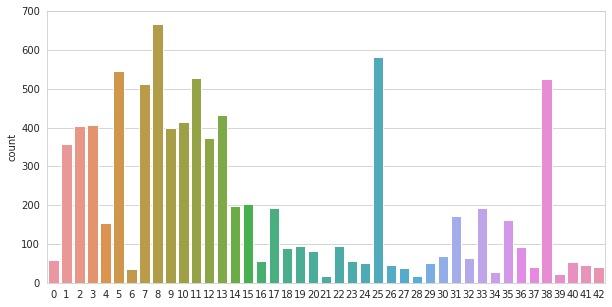

In [16]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(test_label)

### 디버그

In [17]:
img_data = [np.array(x) for x in test_data]
img_df = pd.DataFrame({'img':img_data, 'file_name':file_name, 'label':test_label})
debug_data = img_df.sort_values(by=['file_name'])

def debug_image(debug_data, category, next_file=None):
    filter_data = debug_data[debug_data['label']==category].reset_index()
    if next_file is not None:
        filter_data = filter_data[filter_data['file_name'] > next_file]

    fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize=(18, 23))
    for i, ax in enumerate(axes.flat):
        record = filter_data.iloc[i]
        img = record['img']
        file_name = record['file_name']
        ax.imshow(img)
        ax.set_title(file_name, fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show() 

In [ ]:
debug_image(debug_data, 2)

### 모델 성능 평가

In [34]:
from tensorflow import keras 

In [35]:
path_dict = {
    'mobile_pretrained' : ('./workplace/model/mobilenet_pretrained_fine_tuning.h5', None),
    'moblie_gray_pretraiend' : ('./workplace/model/mobilenet_pretrained_fine_tuning.h5', preprocessing),
    'resnet50_pretrained' :  ('./workplace/model/resnet50_pretrained_fine_tuning.h5', None),
    'resnet50_gray_pretraiend' : ('./workplace/model/gray_resnet50_pretrained_fine_tuning.h5', preprocessing)
}

In [36]:
model_list = []
for key, value in path_dict.items():
    model_path = value[0]
    preprocessing = value[1]
    model =  CNN(keras.models.load_model(model_path), preprocessing)
    model_list.append(model)
    

In [16]:
temp_pred = []
for clf in model_list:
    y_pred = clf.predict(X_test)
    temp_pred.append(y_pred)

predictions = np.asarray(temp_pred).T
majority_label = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=predictions.astype('int'))

AttributeError: ignored

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), majority_label))

In [18]:
temp_pred = []
test_set = [test_data_180, test_data_180, test_data_224, test_data_224]
for i, clf in enumerate(model_list):
    y_pred = clf.predict(test_set[i])
    temp_pred.append(y_pred)

predictions = np.asarray(temp_pred).T
majority_label = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=predictions.astype('int'))

AttributeError: ignored

In [140]:
test_label = majority_label

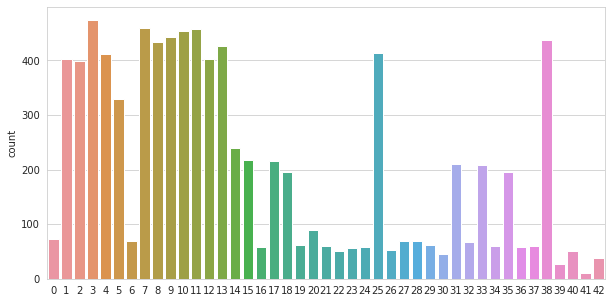

In [139]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(test_label)

In [142]:
img_data = [np.array(x) for x in test_data]
img_df = pd.DataFrame({'img':img_data, 'file_name':file_name, 'label':test_label})
debug_data = img_df.sort_values(by=['file_name'])

def debug_image(debug_data, category, next_file=None):
    filter_data = debug_data[debug_data['label']==category].reset_index()
    if next_file is not None:
        filter_data = filter_data[filter_data['file_name'] > next_file]

    fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize=(18, 23))
    for i, ax in enumerate(axes.flat):
        record = filter_data.iloc[i]
        img = record['img']
        file_name = record['file_name']
        ax.imshow(img)
        ax.set_title(file_name, fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show() 

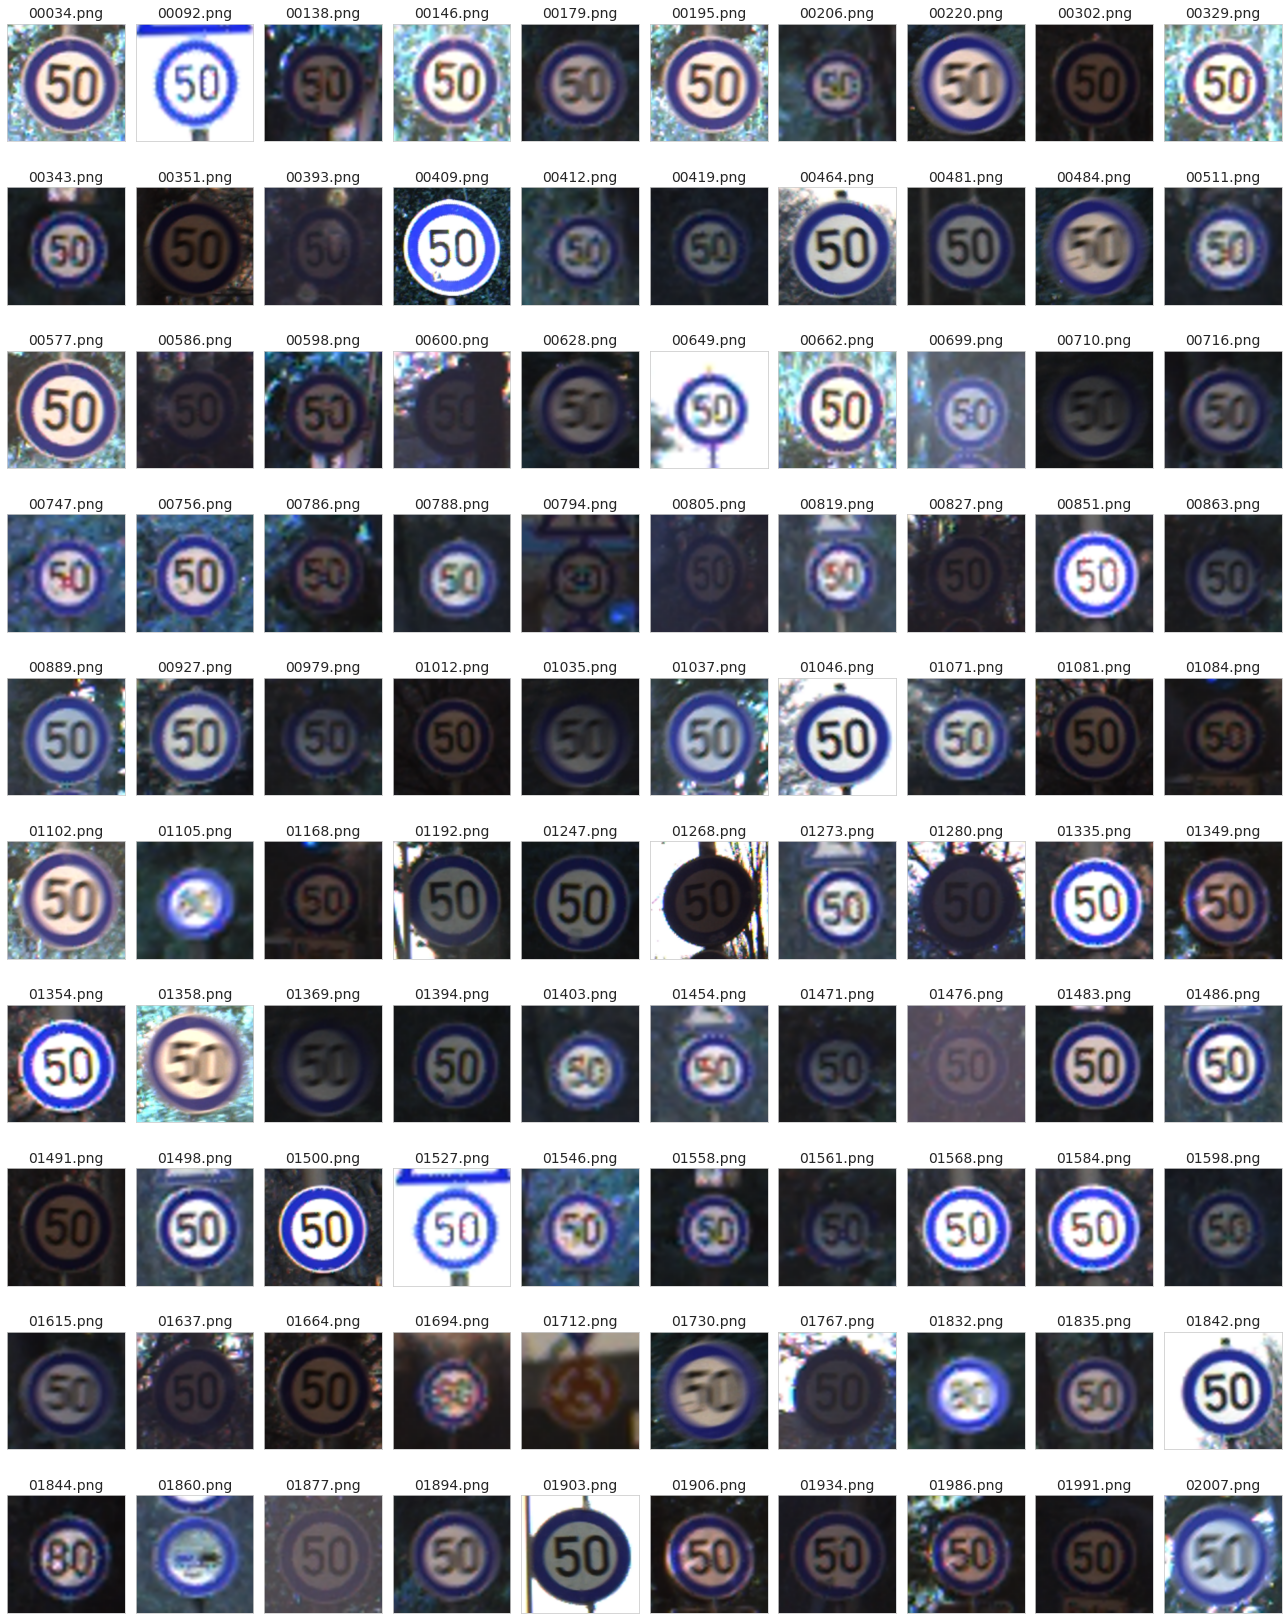

In [147]:
debug_image(debug_data, 2)

In [ ]:
csv_data = pd.DataFrame(np.concatenate((file_name.reshape(-1, 1), test_label.reshape(-1,1)), axis=1))

In [ ]:
csv_data = csv_data.sort_values(by=[0])
csv_data.head()

,0,1
279,00000.png,16
8119,00001.png,1
3628,00002.png,38
1565,00003.png,33
5360,00004.png,11


In [ ]:
csv_data.to_csv("predicted_output_v6.csv", header=False, index=False)

In [ ]:
from google.colab import files
files.download("predicted_output_v6.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 정답지 확인

In [ ]:
def show_sample_image(data, label, category):
    fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize=(10, 10))
    img_filter = np.argwhere(label==category).reshape(-1)
    img = data[img_filter]
    index = np.random.choice(list(range(len(img))), 25)
    for i, ax in enumerate(axes.flat):
        r = index[i]
        ax.imshow(img[r])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show() 

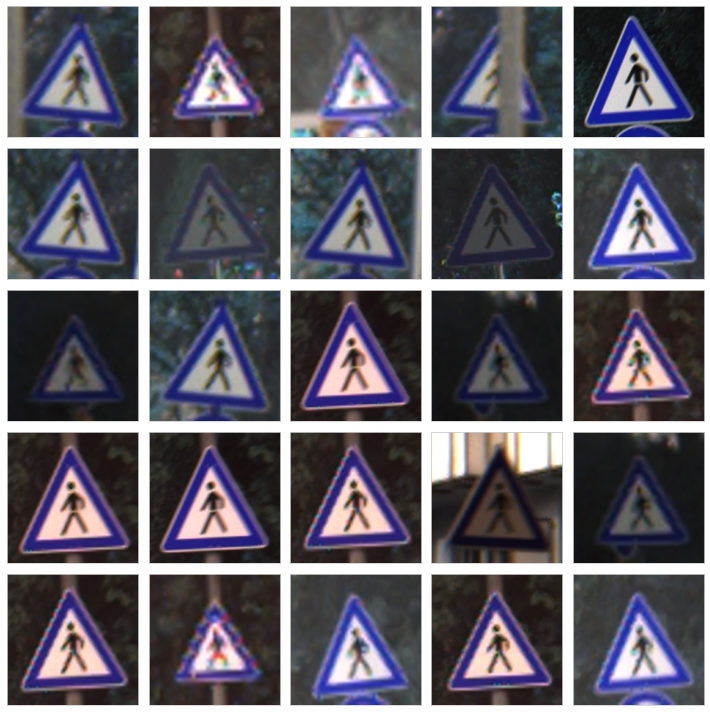

In [ ]:
show_sample_image(data, labels, 27)

([], <a list of 0 Text major ticklabel objects>)

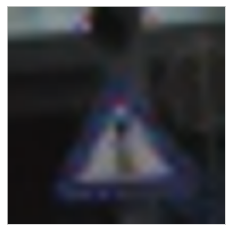

In [ ]:
file_name = '00283.png'
img = np.array(debug_data[debug_data['file_name']==file_name]['img'])[0]
plt.imshow(img)
plt.xticks([])
plt.yticks([])

In [ ]:
img.shape

(3,)

In [ ]:
np.array(img['img'])[0].shape

(180, 180, 3)

### 주석

살짝 로테이션 줘야하나

```python
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

# Prepare data-augmenting data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        preprocessing_function=add_noise,
    )
```

```python
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeClassifier())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeClassifier())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble
```
